In [603]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [604]:
data = pd.read_csv("quikr_car.csv")

### ANALYZING THE DATA

In [605]:
data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [606]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [607]:
data.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [608]:
data.isna().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

### CLEANING THE DATA

In [609]:
data = data[~data["fuel_type"].isna()]
data.shape

(837, 6)

In [610]:
data = data[~data["company"].isna()]
data.shape

(837, 6)

In [611]:
data = data[~data["kms_driven"].isna()]
data.shape

(837, 6)

In [612]:
data = data[~data["year"].isna()]
data.shape

(837, 6)

In [613]:
data = data[~data["name"].isna()]
data.shape

(837, 6)

In [614]:
data = data[data["Price"] != "Ask For Price"]
data.shape

(816, 6)

In [615]:
data = data[data["year"].str.isnumeric()]

In [616]:
data["year"] = data["year"].astype(int)

In [617]:
data["Price"] = data["Price"].str.replace(",","").astype(int)

In [618]:
data["kms_driven"] = data["kms_driven"].str.split().str.get(0).str.replace(",","")

In [619]:
data = data[data["kms_driven"].str.isnumeric()]

In [620]:
data["kms_driven"] = data["kms_driven"].astype(int)

In [621]:
data["name"] = data["name"].str.split().str.slice(start=0,stop=3).str.join(" ")

In [622]:
data.reset_index(drop=True,inplace=True)

### PLOTTIONG THE RELATIONSHIPS

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

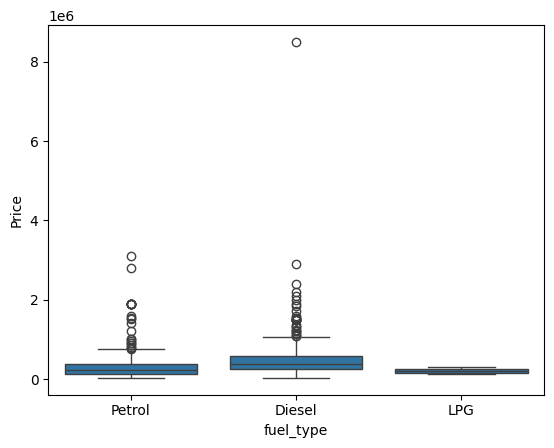

In [623]:
sns.boxplot(data = data , x = "fuel_type",y = "Price")

### Checking relationship of Year with Price

In [ ]:
sns.swarmplot(x='year',y='Price',data=data)

### Checking relationship of kms_driven with Price

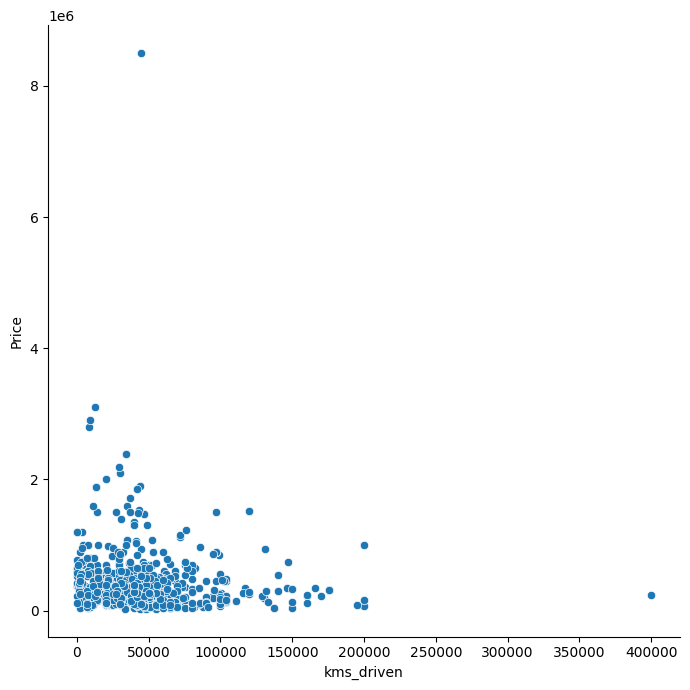

In [624]:
sns.relplot(data =data , x = "kms_driven",y = "Price",height=7,aspect=1)
plt.show()

### Checking relationship of company Type with Price

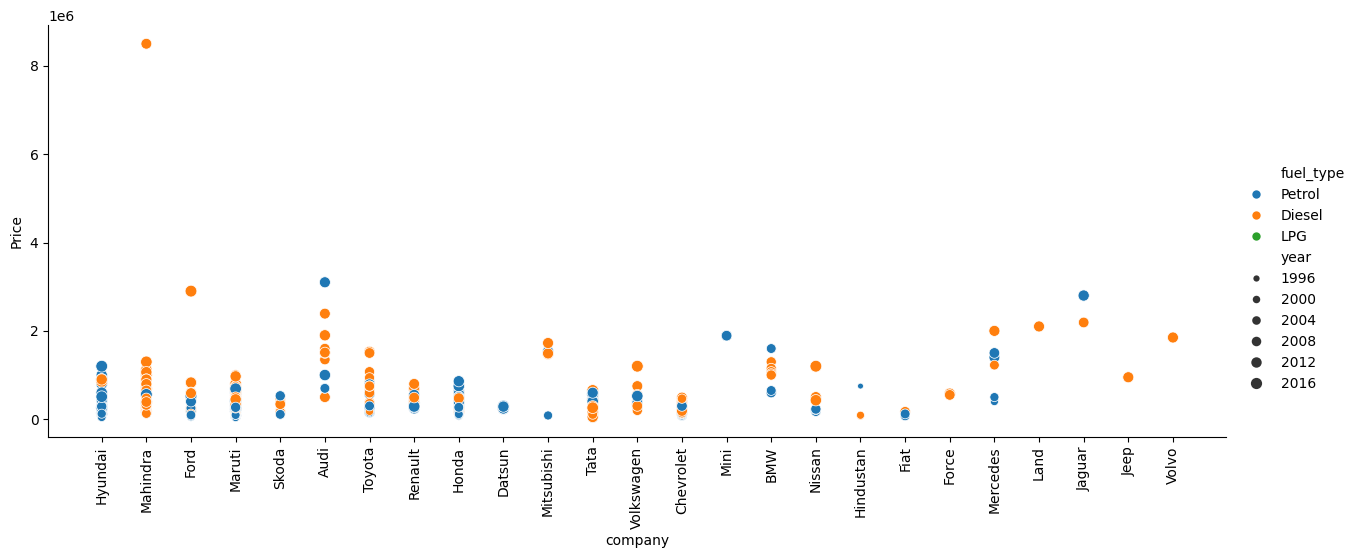

In [625]:
sns.relplot(data = data , x = "company" , y = "Price",hue="fuel_type",size= "year",aspect=2.5)
plt.xticks(rotation = 90)
plt.show()

### MAKING PIPELINE AND FINDING THE BEST FIT FOR MODEL

In [626]:
ohe = OneHotEncoder()
ohe.fit(data[["name","company","fuel_type"]])

OneHotEncoder()

In [627]:
transformer = make_column_transformer((OneHotEncoder(categories=ohe.categories_) , ["name","company","fuel_type"]) ,remainder="passthrough")

In [628]:
pipe_model = make_pipeline(transformer,LinearRegression())

In [629]:
scores = []
for i in range(1000):

    train_x , test_x,train_y,test_y = train_test_split(data[["name","company","fuel_type","year","kms_driven"]],data["Price"],test_size=0.1,random_state=i)
    pipe_model.fit(train_x,train_y)
    score = pipe_model.score(test_x,test_y)
    scores.append(score)



In [630]:
np.max(scores)

0.8604438371028031

In [631]:
random_state = np.argmax(scores)
random_state

247

In [632]:
train_x , test_x,train_y,test_y = train_test_split(data[["name","company","fuel_type","year","kms_driven"]],data["Price"],test_size=0.1,random_state= random_state)
pipe_model.fit(train_x,train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

### FINAL SCORE

In [633]:
pipe_model.score(test_x,test_y)

0.8604438371028031

In [1]:
import sys

In [2]:
print(sys.executable)

c:\Program Files\Python311\python.exe
